In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import math
import os
import time
import pickle

from utils import next_batch, calculate_accuracy
from model import Model
NUM_CLASSES = 43

def preprocess_data(X, y):
    # Make all image array values fall within the range -1 to 1
    # Note all values in original images are between 0 and 255, as uint8
    X = X.astype('float32')
#     X = (X - 128.) #/ 128.

    # Convert the labels from numerical labels to one-hot encoded labels
    y_onehot = np.zeros((y.shape[0], NUM_CLASSES))
    for i, onehot_label in enumerate(y_onehot):
        onehot_label[y[i]] = 1.
    y = y_onehot

    return X, y

model = Model()

x, y, logits, predictions, accuracy = model.x, model.y, model.logits, model.predictions, model.accuracy
keep_prob = model.keep_prob
loss = model.loss

grad = tf.sign(tf.gradients(loss, x))[0]

label_map = {}
with open('signnames.csv', 'r') as f:
    first_line = True
    for line in f:
        # Ignore first line
        if first_line:
            first_line = False
            continue

        # Populate label_map
        label_int, label_string = line.split(',')
        label_int = int(label_int)

        label_map[label_int] = label_string

with open('test.p', mode='rb') as f:
    test = pickle.load(f)
X_test, y_test = test['features'], test['labels']
X_test, y_test = preprocess_data(X_test, y_test)

2.6.0


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [11]:
grad = tf.sign(tf.gradients(model.reg_loss, x))[0]
import copy
# grad = tf.sign(tf.gradients(loss, x))[0]
def attack(sess, images, labels, i):

    eps = i
    step = 1
    x = copy.copy(images)
    
    for i in range(10):
        gradients = sess.run(grad, feed_dict={model.x: x, model.y: labels, model.keep_prob: 1.})
        x = x - step * gradients
        x = np.clip(x, images - eps, images + eps)
        x = np.clip(x, 0., 255.)

    return x

In [13]:
with tf.Session() as sess:

    saver = tf.train.Saver()
    filename = tf.train.latest_checkpoint("./natural_model/")
#     filename = tf.train.latest_checkpoint("./robust_model_100/")
    print("Latest training checkpoint is ", filename)
    if filename != None:
        saver.restore(sess, filename)
    else:
        print("No checkpoint found, exit.")
        exit()

    test_gen = next_batch(X_test, y_test, 1000, True)
    images, labels = next(test_gen)
    acc = sess.run(model.accuracy, feed_dict={x: images, y: labels, keep_prob: 1})
    
    for i in range(10):
            
        adv_images = attack(sess, images, labels, i)
        
        adv_acc = sess.run(model.accuracy, feed_dict={x: adv_images, y: labels, keep_prob: 1})
        
        print(i, "Accuracy is", acc, "Adv Accuracy is", adv_acc)

Latest training checkpoint is  ./natural_model/checkpoint-50400
INFO:tensorflow:Restoring parameters from ./natural_model/checkpoint-50400
0 Accuracy is 0.96 Adv Accuracy is 0.96
1 Accuracy is 0.96 Adv Accuracy is 0.644
2 Accuracy is 0.96 Adv Accuracy is 0.384
3 Accuracy is 0.96 Adv Accuracy is 0.216
4 Accuracy is 0.96 Adv Accuracy is 0.113
5 Accuracy is 0.96 Adv Accuracy is 0.058
6 Accuracy is 0.96 Adv Accuracy is 0.035
7 Accuracy is 0.96 Adv Accuracy is 0.025
8 Accuracy is 0.96 Adv Accuracy is 0.017
9 Accuracy is 0.96 Adv Accuracy is 0.014


In [43]:
with tf.Session() as sess:

    saver = tf.train.Saver()
#     filename = tf.train.latest_checkpoint("./robust_model_100/")
    filename = tf.train.latest_checkpoint("./natural_model/")
    print("Latest training checkpoint is ", filename)
    if filename != None:
        saver.restore(sess, filename)
    else:
        print("No checkpoint found, exit.")
        exit()

    test_gen = next_batch(X_test, y_test, 1000, True)
    images, labels = next(test_gen)
    acc = sess.run(model.accuracy, feed_dict={x: images, y: labels, keep_prob: 1})
    for i in range(20):
        rain_images = rain(images, i)
        adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
        print("Rain Drops %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
#     for i in range(20):
#         rain_images = fog(images, i)
#         adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
#         print("Fog density %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
#     for i in range(20):
#         rain_images = light(images, i)
#         adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
#         print("Light intensity %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
#     for i in range(20):
#         rain_images = dark(images, i)
#         adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
#         print("Darkness %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
#     for i in range(20):
#         rain_images = blur(images, i)
#         adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
#         print("Blur deviation %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)

#         grad_loss = sess.run(model.grad_loss, feed_dict={x: images, y: labels, keep_prob: 1})
#         print(grad_loss)

#         idx = sess.run(model.predictions, feed_dict={x: images, y: labels, keep_prob: 1})

#         adv_idx = sess.run(model.predictions, feed_dict={x: adv_images, y: labels, keep_prob: 1})
#         print("Original Label is:", label_map[np.argmax(labels[0])])

#         plt.subplot(1,2,1)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[idx[0]])
#         plt.subplot(1,2,2)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[adv_idx[0]])
#         plt.show()
#         print(label_map[idx[0]], label_map[adv_idx[0]])

Latest training checkpoint is  ./natural_model/checkpoint-50400
INFO:tensorflow:Restoring parameters from ./natural_model/checkpoint-50400
Rain Drops 00  vs. Accuracy vs Adv_Accuracy： 0.96 0.96
Rain Drops 01  vs. Accuracy vs Adv_Accuracy： 0.96 0.835
Rain Drops 02  vs. Accuracy vs Adv_Accuracy： 0.96 0.79
Rain Drops 03  vs. Accuracy vs Adv_Accuracy： 0.96 0.738
Rain Drops 04  vs. Accuracy vs Adv_Accuracy： 0.96 0.715
Rain Drops 05  vs. Accuracy vs Adv_Accuracy： 0.96 0.697
Rain Drops 06  vs. Accuracy vs Adv_Accuracy： 0.96 0.684
Rain Drops 07  vs. Accuracy vs Adv_Accuracy： 0.96 0.692
Rain Drops 08  vs. Accuracy vs Adv_Accuracy： 0.96 0.648
Rain Drops 09  vs. Accuracy vs Adv_Accuracy： 0.96 0.642
Rain Drops 10  vs. Accuracy vs Adv_Accuracy： 0.96 0.586
Rain Drops 11  vs. Accuracy vs Adv_Accuracy： 0.96 0.557
Rain Drops 12  vs. Accuracy vs Adv_Accuracy： 0.96 0.557
Rain Drops 13  vs. Accuracy vs Adv_Accuracy： 0.96 0.552
Rain Drops 14  vs. Accuracy vs Adv_Accuracy： 0.96 0.527
Rain Drops 15  vs. Accu

In [16]:
def rain(images, eps):
    x = copy.copy(images)
    batch_size = images.shape[0]
    for i in range(batch_size):
#         if np.mean(x[i]) > 100 and i < 1:
#             x[i] = x[i] / (1+eps*0.15)
        for j in range(eps*40):
            np.random.seed(j)
            x_idx = np.random.randint(0, 32)
            y_idx = np.random.randint(0, 32)
            x[i, x_idx:x_idx+2, y_idx, :] = 0.8*x[i, x_idx:x_idx+2, y_idx, :] + 0.2*255
    x = np.clip(x, 0., 255.)
    return x
    

In [17]:
def fog(images, eps):
    x = copy.copy(images)
    batch_size = images.shape[0]
#     x = x / (eps*0.3+1) + eps * 10
    x = x *(1-eps*0.04) + eps * 7
#     for i in range(batch_size):
#         image = x[i].reshape(32, 32, 3)
#         temp = gaussian_filter(image, sigma=0.7)
#         x[i] = temp
    x = np.clip(x, 0., 255.)
    return x

In [18]:
def dark(images, eps):
    x = copy.copy(images)
    x = x - eps*10.
    x = np.clip(x, 0., 255.)
    return x

def light(images, eps):
    x = copy.copy(images)
    x = x + eps*10.
    x = np.clip(x, 0., 255.)
    return x

In [19]:
from scipy.ndimage.filters import gaussian_filter

def blur(images, eps):
    batch_size = images.shape[0]
    x = np.zeros(images.shape)
    for i in range(batch_size):
        image = images[i].reshape(32, 32, 3)
        temp = gaussian_filter(image, sigma=0.5+eps*0.1)
        x[i] = temp
    x = np.clip(x, 0., 255.)
    return x

In [20]:
import copy
def ocul(images, eps):
    batch_size = images.shape[0]
    x = copy.copy(images)
    for i in range(batch_size):
        image = images[i].reshape(32, 32, 3)
        idx = np.random.randint(0, 32-eps)
        x[i, idx:idx+eps, idx:idx+eps, :] = 0.
#         x[i] = image
    return x

In [44]:
with tf.Session() as sess:

    saver = tf.train.Saver()
    filename = tf.train.latest_checkpoint("./robust_model_100/")
#     filename = tf.train.latest_checkpoint("./natural_model/")
    print("Latest training checkpoint is ", filename)
    if filename != None:
        saver.restore(sess, filename)
    else:
        print("No checkpoint found, exit.")
        exit()

    test_gen = next_batch(X_test, y_test, 5000, True)
    images, labels = next(test_gen)
    acc = sess.run(model.accuracy, feed_dict={x: images, y: labels, keep_prob: 1})
    for i in range(20):
        rain_images = rain(images, i)
        adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
        print("Rain Drops %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
    for i in range(20):
        rain_images = fog(images, i)
        adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
        print("Fog density %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
    for i in range(20):
        rain_images = light(images, i)
        adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
        print("Light intensity %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
    for i in range(20):
        rain_images = dark(images, i)
        adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
        print("Darkness %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)
    for i in range(20):
        rain_images = blur(images, i)
        adv_acc = sess.run(model.accuracy, feed_dict={x: rain_images, y: labels, keep_prob: 1})
        print("Blur deviation %.2d  vs. Accuracy vs Adv_Accuracy：" % i, acc, adv_acc)

#         grad_loss = sess.run(model.grad_loss, feed_dict={x: images, y: labels, keep_prob: 1})
#         print(grad_loss)

#         idx = sess.run(model.predictions, feed_dict={x: images, y: labels, keep_prob: 1})

#         adv_idx = sess.run(model.predictions, feed_dict={x: adv_images, y: labels, keep_prob: 1})
#         print("Original Label is:", label_map[np.argmax(labels[0])])

#         plt.subplot(1,2,1)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[idx[0]])
#         plt.subplot(1,2,2)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[adv_idx[0]])
#         plt.show()
#         print(label_map[idx[0]], label_map[adv_idx[0]])

Latest training checkpoint is  ./robust_model_100/checkpoint-153720
INFO:tensorflow:Restoring parameters from ./robust_model_100/checkpoint-153720
Rain Drops 00  vs. Accuracy vs Adv_Accuracy： 0.9444 0.9444
Rain Drops 01  vs. Accuracy vs Adv_Accuracy： 0.9444 0.8524
Rain Drops 02  vs. Accuracy vs Adv_Accuracy： 0.9444 0.815
Rain Drops 03  vs. Accuracy vs Adv_Accuracy： 0.9444 0.8054
Rain Drops 04  vs. Accuracy vs Adv_Accuracy： 0.9444 0.7868
Rain Drops 05  vs. Accuracy vs Adv_Accuracy： 0.9444 0.7616
Rain Drops 06  vs. Accuracy vs Adv_Accuracy： 0.9444 0.7428
Rain Drops 07  vs. Accuracy vs Adv_Accuracy： 0.9444 0.7226
Rain Drops 08  vs. Accuracy vs Adv_Accuracy： 0.9444 0.7208
Rain Drops 09  vs. Accuracy vs Adv_Accuracy： 0.9444 0.6952
Rain Drops 10  vs. Accuracy vs Adv_Accuracy： 0.9444 0.6838
Rain Drops 11  vs. Accuracy vs Adv_Accuracy： 0.9444 0.6616
Rain Drops 12  vs. Accuracy vs Adv_Accuracy： 0.9444 0.666
Rain Drops 13  vs. Accuracy vs Adv_Accuracy： 0.9444 0.661
Rain Drops 14  vs. Accuracy vs

In [8]:
with tf.Session() as sess:

    saver = tf.train.Saver()
    filename = tf.train.latest_checkpoint("./robust_model_100/")
    print("Latest training checkpoint is ", filename)
    if filename != None:
        saver.restore(sess, filename)
    else:
        print("No checkpoint found, exit.")
        exit()

    # Accuracy = 0
    # num = 10
    # batch_size = math.ceil(X_test.shape[0] / num)
    test_gen = next_batch(X_test, y_test, 1000, True)

    for i in range(1):

        # Run testing on each batch
        images, labels = next(test_gen)

        adv_images = attack(sess, images, labels)
        # Perform gradient update (i.e. training step) on current batch
        acc = sess.run(model.accuracy, feed_dict={x: images, y: labels, keep_prob: 1})
        adv_acc = sess.run(model.accuracy, feed_dict={x: adv_images, y: labels, keep_prob: 1})
        print("Accuracy vs Adv_Accuracy：", acc, adv_acc)
        grad_loss = sess.run(model.grad_loss, feed_dict={x: images, y: labels, keep_prob: 1})
        print(grad_loss)

#         idx = sess.run(model.predictions, feed_dict={x: images, y: labels, keep_prob: 1})

#         adv_idx = sess.run(model.predictions, feed_dict={x: adv_images, y: labels, keep_prob: 1})
#         print("Original Label is:", label_map[np.argmax(labels[0])])

#         plt.subplot(1,2,1)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[idx[0]])
#         plt.subplot(1,2,2)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[adv_idx[0]])
#         plt.show()
        # 		print(label_map[idx[0]], label_map[adv_idx[0]])

Latest training checkpoint is  ./robust_model_100/checkpoint-153720
INFO:tensorflow:Restoring parameters from ./robust_model_100/checkpoint-153720
Accuracy vs Adv_Accuracy： 0.946 0.609
8.238152e-08


In [9]:
with tf.Session() as sess:

    saver = tf.train.Saver()
    filename = tf.train.latest_checkpoint("./natural_model/")
    print("Latest training checkpoint is ", filename)
    if filename != None:
        saver.restore(sess, filename)
    else:
        print("No checkpoint found, exit.")
        exit()

    # Accuracy = 0
    # num = 10
    # batch_size = math.ceil(X_test.shape[0] / num)
    test_gen = next_batch(X_test, y_test, 1000, True)

    for i in range(1):

        # Run testing on each batch
        images, labels = next(test_gen)

        adv_images = attack(sess, images, labels)

        # Perform gradient update (i.e. training step) on current batch
        acc = sess.run(model.accuracy, feed_dict={x: images, y: labels, keep_prob: 1})
        adv_acc = sess.run(model.accuracy, feed_dict={x: adv_images, y: labels, keep_prob: 1})
        print("Accuracy vs Adv_Accuracy：", acc, adv_acc)
        grad_loss = sess.run(model.grad_loss, feed_dict={x: images, y: labels, keep_prob: 1})
        print(grad_loss)

#         idx = sess.run(model.predictions, feed_dict={x: images, y: labels, keep_prob: 1})

#         adv_idx = sess.run(model.predictions, feed_dict={x: adv_images, y: labels, keep_prob: 1})
#         print("Original Label is:", label_map[np.argmax(labels[0])])

#         plt.subplot(1,2,1)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[idx[0]])
#         plt.subplot(1,2,2)
#         plt.imshow(images.reshape((32, 32, 3)))
#         plt.title(label_map[adv_idx[0]])
#         plt.show()
        # 		print(label_map[idx[0]], label_map[adv_idx[0]])

Latest training checkpoint is  ./natural_model/checkpoint-50400
INFO:tensorflow:Restoring parameters from ./natural_model/checkpoint-50400
Accuracy vs Adv_Accuracy： 0.96 0.217
2.5545069e-06


In [49]:
print(label_map)

{0: 'Speed limit (20km/h)\n', 1: 'Speed limit (30km/h)\n', 2: 'Speed limit (50km/h)\n', 3: 'Speed limit (60km/h)\n', 4: 'Speed limit (70km/h)\n', 5: 'Speed limit (80km/h)\n', 6: 'End of speed limit (80km/h)\n', 7: 'Speed limit (100km/h)\n', 8: 'Speed limit (120km/h)\n', 9: 'No passing\n', 10: 'No passing for vechiles over 3.5 metric tons\n', 11: 'Right-of-way at the next intersection\n', 12: 'Priority road\n', 13: 'Yield\n', 14: 'Stop\n', 15: 'No vechiles\n', 16: 'Vechiles over 3.5 metric tons prohibited\n', 17: 'No entry\n', 18: 'General caution\n', 19: 'Dangerous curve to the left\n', 20: 'Dangerous curve to the right\n', 21: 'Double curve\n', 22: 'Bumpy road\n', 23: 'Slippery road\n', 24: 'Road narrows on the right\n', 25: 'Road work\n', 26: 'Traffic signals\n', 27: 'Pedestrians\n', 28: 'Children crossing\n', 29: 'Bicycles crossing\n', 30: 'Beware of ice/snow\n', 31: 'Wild animals crossing\n', 32: 'End of all speed and passing limits\n', 33: 'Turn right ahead\n', 34: 'Turn left ahea

Latest training checkpoint is  ./robust_model_100/checkpoint-153720
INFO:tensorflow:Restoring parameters from ./robust_model_100/checkpoint-153720


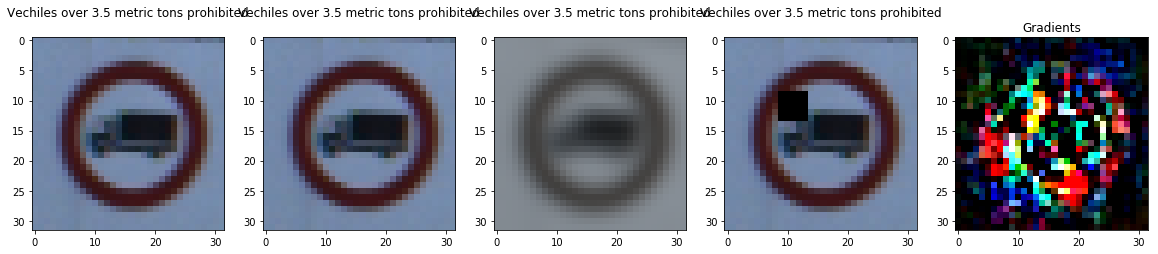

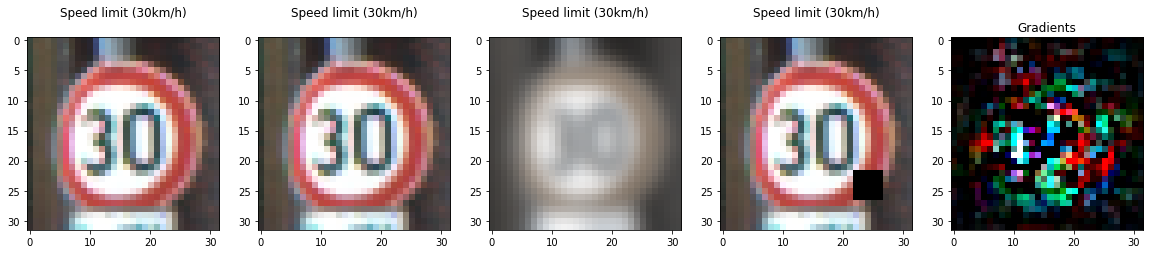

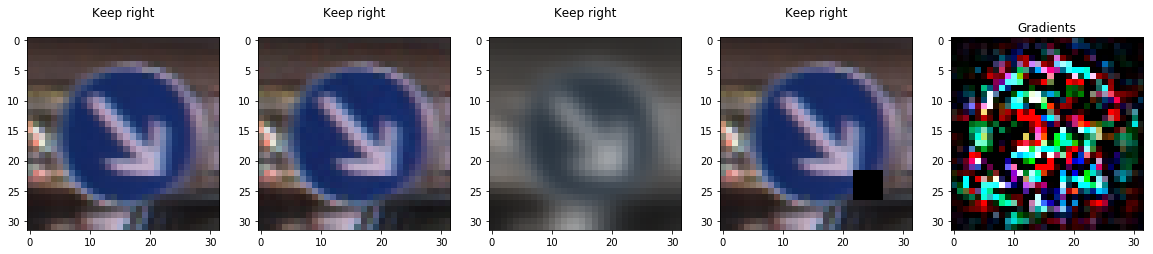

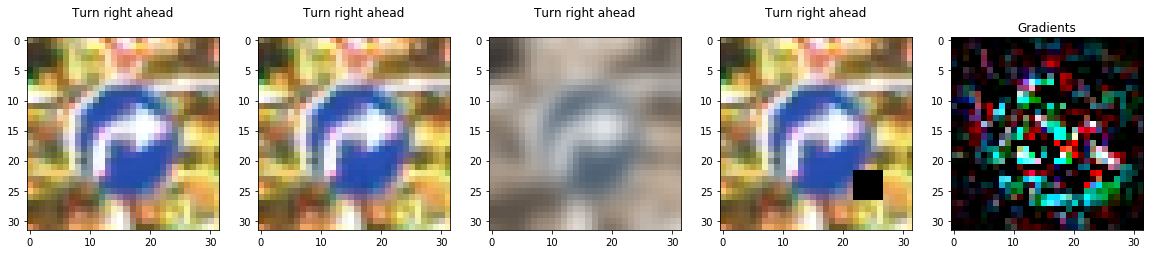

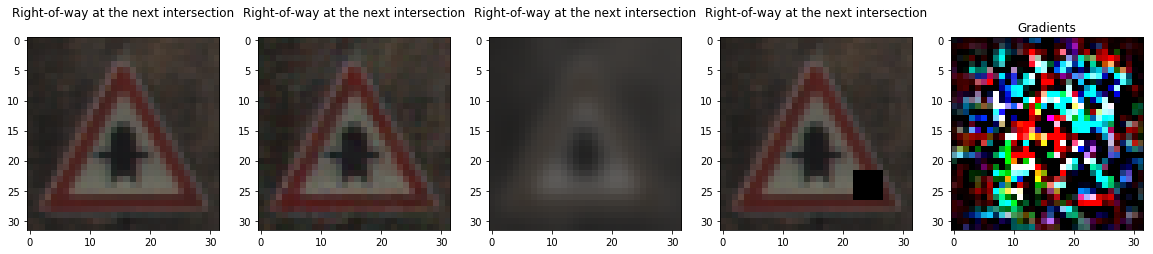

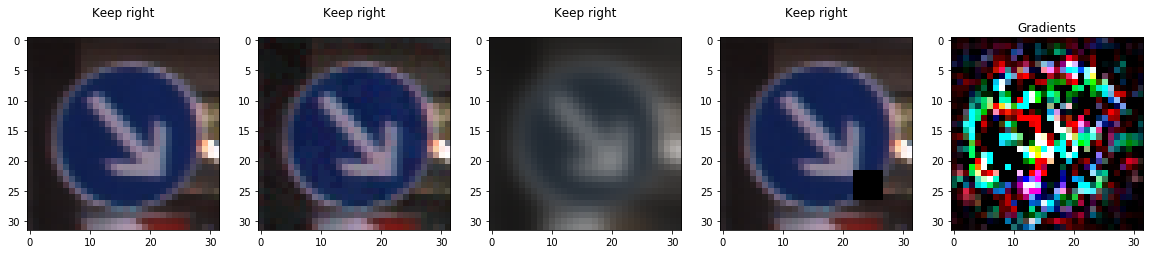

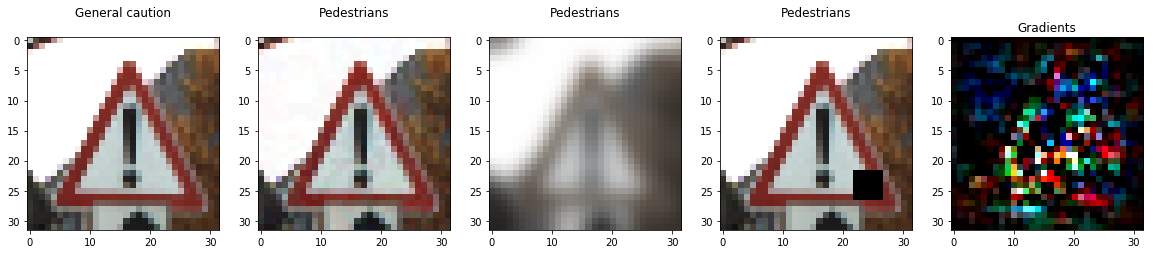

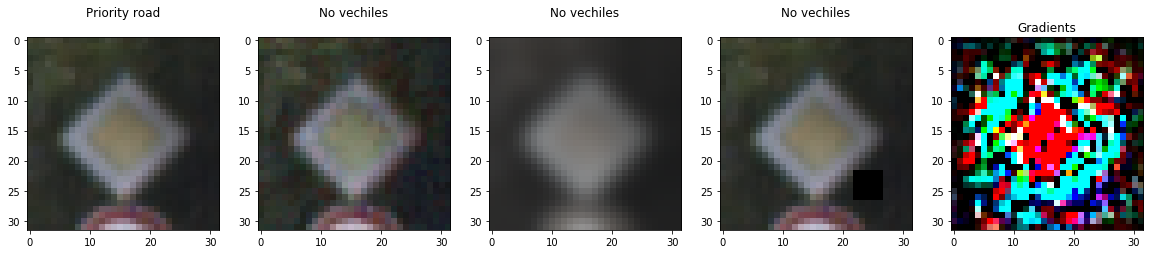

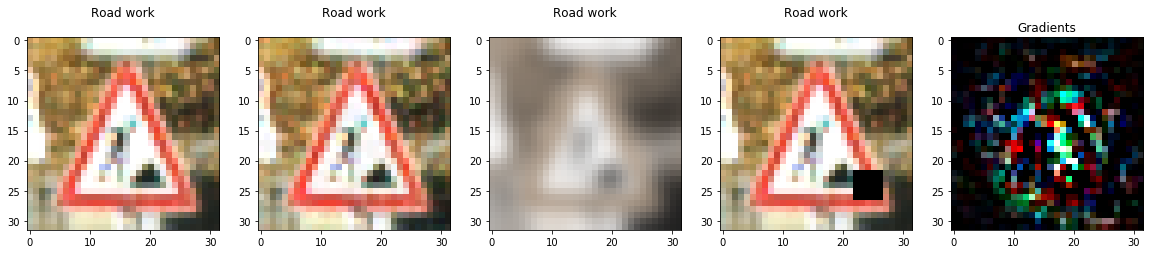

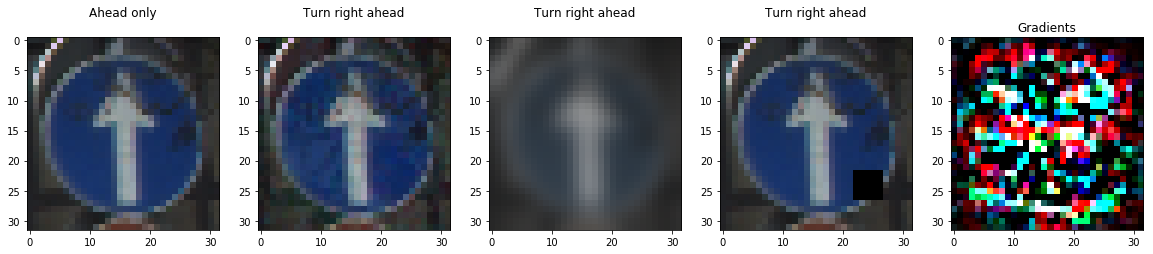

In [21]:
with tf.Session() as sess:

    saver = tf.train.Saver()
#     filename = tf.train.latest_checkpoint("./natural_model/")
    filename = tf.train.latest_checkpoint("./robust_model_100/")
    print("Latest training checkpoint is ", filename)
    if filename != None:
        saver.restore(sess, filename)
    else:
        print("No checkpoint found, exit.")
        exit()

    # Accuracy = 0
    # num = 10
    # batch_size = math.ceil(X_test.shape[0] / num)
    test_gen = next_batch(X_test, y_test, 1, True)

    for i in range(10):
        plt.figure(figsize=(20,10))
        # Run testing on each batch
        images, labels = next(test_gen)
#         if np.argmax(labels) != 14.:
#             continue
        adv_images = attack(sess, images, labels, i)
        blr_images = blur(images, 10)
        ocl_images = ocul(images, 5)
        rain_images = rain(images, 20)
        # Perform gradient update (i.e. training step) on current batch
        # acc = sess.run(model.accuracy, feed_dict={x: images, y: labels, keep_prob: 1})
        # adv_acc = sess.run(model.accuracy, feed_dict={x: adv_images, y: labels, keep_prob: 1})

        idx = sess.run(model.predictions, feed_dict={x: images, y: labels, keep_prob: 1})

        adv_idx = sess.run(model.predictions, feed_dict={x: adv_images, y: labels, keep_prob: 1})
#         print("Original Label is:", label_map[np.argmax(labels[0])])
        
        gradients = sess.run(model.vis, feed_dict={x: images, y: labels, keep_prob: 1})

        plt.subplot(1,5,1)
        images = images.astype(np.uint8)
        plt.imshow(images.reshape((32, 32, 3)))
        plt.title(label_map[idx[0]])
        
        plt.subplot(1,5,2)
        adv_images = adv_images.astype(np.uint8)
        plt.imshow(adv_images.reshape((32, 32, 3)))
        plt.title(label_map[adv_idx[0]])
        
        plt.subplot(1,5,3)
        blr_images = blr_images.astype(np.uint8)
        plt.imshow(blr_images.reshape((32, 32, 3)))
        plt.title(label_map[adv_idx[0]])
        
        plt.subplot(1,5,4)
        ocl_images = ocl_images.astype(np.uint8)
        plt.imshow(ocl_images.reshape((32, 32, 3)))
        plt.title(label_map[adv_idx[0]])
        
        plt.subplot(1,5,5)
        gradients = gradients * 1000
        gradients = np.clip(gradients, 0., 1.)*255
        gradients = gradients.astype(np.uint8)
#         print(gradients)
        plt.imshow(gradients.reshape((32, 32, 3)))
        plt.title("Gradients")
#         plt.show()
        # 		print(label_map[idx[0]], label_map[adv_idx[0]])